<a href="https://colab.research.google.com/github/hafizecim/Convolutional-Neural-Network-CNN-with-CIFAR-10-using-TensorFlow/blob/main/ConvolutionalNeuralNetworkCNNCIFRAR10TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# **Download CIFAR10 dataset**

<small>

**Bu bölümde gerekli kütüphaneler projeye dahil edilmiştir:**

- **tensorflow:** Derin öğrenme modelleri oluşturmak için kullanılır.
- **keras (tensorflow.keras):** CNN modelinin katmanlarını ve mimarisini oluşturmak için kullanılır.
- **matplotlib.pyplot:** Eğitim sonuçlarını (loss, accuracy) grafik olarak çizmek için kullanılır.

</small>


In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


<small>

**CIFAR-10 veri seti yükleniyor.**  
train_images, train_labels → eğitim verileri ve etiketleri  
test_images, test_labels → test verileri ve etiketleri  

</small>

In [4]:
# Normalize the pixel values to range 0 to 1
# train_images.shape
# test_images.shape
# 1. Veri setini yükle
train_images, test_images = train_images / 255.0, test_images / 255.0

(10000, 32, 32, 3)

<small>

**train_images.shape** (50000, 32, 32, 3)

Eğitim veri setindeki görüntülerin boyutlarını gösterir  
(örneğin: adet, yükseklik, genişlik, kanal sayısı)

**test_images.shape**
(10000, 32, 32, 3)
</small>


<small>

**train_images, test_images = train_images / 255.0, test_images / 255.0**  
Görüntü verileri 0–255 aralığından 0–1 aralığına ölçeklenir.  
Bu normalizasyon, modelin daha hızlı ve daha doğru öğrenmesini sağlar.

</small>


**Visuazlize the images**

In [6]:
# train_images
# 2. Sınıf isimlerini tanımla
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

<small>

**train_images**  
CIFAR-10 eğitim görüntülerini içerir.  
Her bir veri: 32×32 piksel ve 3 kanallıdır (RGB).  
Toplam 50.000 adet eğitim resmi bulunur.

</small>


<small>

**class_names**  
CIFAR-10 veri setindeki 10 sınıfın isimlerini içerir.  
Bu sınıflar modelin tahmin ettiği kategorilerdir:  
airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck.

</small>


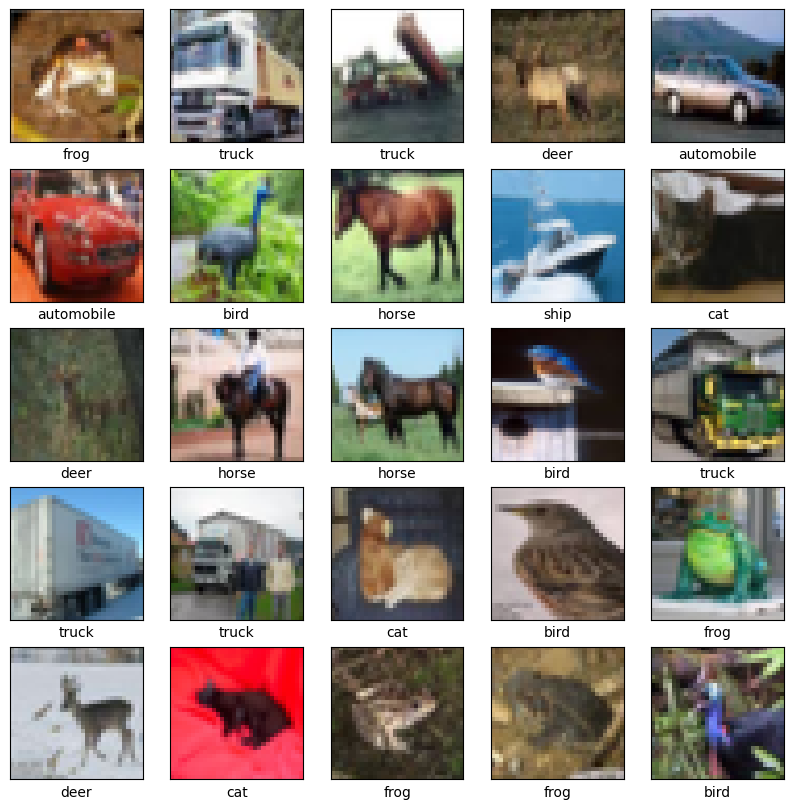

In [13]:
# 3. İlk 25 görüntüyü görselleştir
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i]) # Etiketi (label) başlık olarak ekle
    # plt.title(class_names[train_labels[i][0]])
    # plt.show() # Grafiği/görüntüleri göster

    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

<small>

**Bu kod bloğu, CIFAR-10 eğitim setinden ilk 25 görüntüyü 5×5 bir grid içinde görselleştirir.**

- `plt.figure(figsize=(10,10))` → Grafik alanının genişlik ve yükseklik değerlerini ayarlar.  
- `for i in range(25):` → İlk 25 görüntüyü sırayla işler.  
- `plt.subplot(5,5,i+1)` → 5×5 grid yapısında her görüntü için bir hücre oluşturur.  
- `plt.xticks([])` ve `plt.yticks([])` → Eksen işaretlerini kaldırarak görüntüyü sadeleştirir.  
- `plt.grid(False)` → Grid çizgilerini kapatır.  
- `plt.imshow(train_images[i])` → İlgili görüntüyü ekrana çizer (RGB formatında).  
- `plt.title(class_names[train_labels[i][0]])` → Görüntünün sınıf adını başlık olarak ekler.  
- `plt.xlabel(class_names[train_labels[i][0]])` → Aynı sınıf adını alt yazı olarak ekler.  
- `plt.show()` → Her görüntüyü anında ekranda gösterir.

**Not:** Döngü içinde `plt.show()` kullanıldığında her resim ayrı ayrı gösterilir.  
Tüm resimlerin tek bir grid içinde görünmesini istersen `plt.show()` döngü dışına alınmalıdır.

</small>


In [11]:
# type(train_images) # train_images değişkeninin veri tipini sorgular.
                   # CIFAR-10 yüklemesi TensorFlow/Keras aracılığıyla yapıldığı için,
                   # sonuç genellikle çok boyutlu bir dizi olan 'numpy.ndarray' olacaktır.

<small>

**type(train_images)**  
`train_images` değişkeninin hangi veri tipinde olduğunu gösterir.  
Genellikle `numpy.ndarray` tipindedir, çünkü CIFAR-10 verileri NumPy dizisi olarak yüklenir.

</small>


In [10]:
# train_images.shape
# Çıktı: (50000, 32, 32, 3)
# train_images[0]
# plt.imshow(train_images[0])

<small>

**train_images.shape**  
Eğitim veri setindeki görüntülerin boyutlarını gösterir.  
CIFAR-10 için tipik çıktı: **(50000, 32, 32, 3)**  
→ 50.000 görüntü, 32×32 piksel, 3 kanal (RGB).

</small>


<small>

**plt.imshow(train_images[0])**  
Eğitim veri setindeki ilk görüntüyü ekranda gösterir.  
`imshow()` fonksiyonu, bir NumPy dizisini renkli bir görüntü olarak görselleştirir.

</small>


# **Create the convolutional base**
# **Conv2D**
# **MaxPooling2D layers**



In [14]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


<small>

**Bu kod, bir CNN (Convolutional Neural Network) modelinin temel evrelerini oluşturur.**

- `model = models.Sequential()`  
  Sıralı (Sequential) bir model başlatır. Katmanlar sırayla eklenir.

- `model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))`  
  32 filtreli bir **Conv2D** katmanı ekler.  
  Filtre boyutu: 3×3  
  Aktivasyon: ReLU  
  Giriş boyutu: 32×32 piksel, 3 kanal (RGB).

- `model.add(layers.MaxPooling2D((2, 2)))`  
  2×2 havuzlama işlemi uygulayarak görüntünün boyutunu yarıya indirir.  
  Modelin daha iyi genelleme yapmasını sağlar.

- `model.add(layers.Conv2D(64, (3, 3), activation='relu'))`  
  64 filtreli ikinci bir **Conv2D** katmanı eklenir.

- `model.add(layers.MaxPooling2D((2, 2)))`  
  Bir kez daha 2×2 havuzlama uygulanır (boyutlar tekrar yarıya iner).

- `model.add(layers.Conv2D(64, (3, 3), activation='relu'))`  
  64 filtreli üçüncü **Conv2D** katmanı eklenir.  
  Bu katman daha derin özellik çıkarımı yapar.

</small>


In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

<small>

**Model Özeti (model.summary())**

Aşağıdaki tablo, CNN modelinin katmanlarını, çıktı boyutlarını ve parametre sayılarını göstermektedir:

---

### 🔹 1. Conv2D (conv2d)  
**Çıkış Boyutu:** (None, 30, 30, 32)  
**Parametre Sayısı:** 896  
- 32 filtre kullanır.  
- Giriş görüntüsü 32×32 → padding olmadığı için boyut 30×30’a düşer.  
- Parametre sayısı: (3×3×3×32) + 32 bias = **896**

---

### 🔹 2. MaxPooling2D (max_pooling2d)  
**Çıkış Boyutu:** (None, 15, 15, 32)  
**Parametre Sayısı:** 0  
- 2×2 havuzlama yapar.  
- Boyut: 30×30 → **15×15**

---

### 🔹 3. Conv2D (conv2d_1)  
**Çıkış Boyutu:** (None, 13, 13, 64)  
**Parametre Sayısı:** 18,496  
- 64 filtre kullanır.  
- Boyut: 15×15 → 13×13  
- Parametre: (3×3×32×64) + 64 bias = **18,496**

---

### 🔹 4. MaxPooling2D (max_pooling2d_1)  
**Çıkış Boyutu:** (None, 6, 6, 64)  
**Parametre Sayısı:** 0  
- 2×2 havuzlama  
- Boyut: 13×13 → **6×6**

---

### 🔹 5. Conv2D (conv2d_2)  
**Çıkış Boyutu:** (None, 4, 4, 64)  
**Parametre Sayısı:** 36,928  
- 64 filtre  
- Boyut: 6×6 → 4×4  
- Parametre: (3×3×64×64) + 64 bias = **36,928**

---

### 🔸 **Toplam Parametre:** 56,320  
### 🔸 **Eğitilebilir Parametre:** 56,320  
### 🔸 **Eğitilemez Parametre:** 0  

**Bu model tamamen eğitilebilir katmanlardan oluşmaktadır.**

</small>


# **Add Dense layers**

In [16]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

<small>

**Model tanımı ve özet**

Yukarıdaki kod, modelin son katmanlarını ekler ve mimariyi özetler.

</small>


# **Compile and train the model**

In [17]:
# Model Compilation
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

<small>

**Modeli Derleme (Compile Etme)**

Yukarıdaki kod, modeli derleyerek optimizer, loss fonksiyonu ve metriği tanımlar.

</small>

In [18]:
# Model Training
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 42ms/step - accuracy: 0.2895 - loss: 2.5620 - val_accuracy: 0.4742 - val_loss: 1.4451
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 41ms/step - accuracy: 0.5143 - loss: 1.3661 - val_accuracy: 0.5290 - val_loss: 1.3695
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.5802 - loss: 1.1870 - val_accuracy: 0.5972 - val_loss: 1.1327
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - accuracy: 0.6220 - loss: 1.0728 - val_accuracy: 0.6144 - val_loss: 1.0925
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - accuracy: 0.6582 - loss: 0.9828 - val_accuracy: 0.6340 - val_loss: 1.0771
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 41ms/step - accuracy: 0.6798 - loss: 0.9188 - val_accuracy: 0.6441 - val_loss: 1.0472
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 42ms/step - accuracy: 0.7014 - loss: 0.8582 - val_accuracy: 0.6503 - val_loss: 1.0408
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - accuracy: 0.7215 -

<small>

**Modelin Eğitilmesi (Training)**  
Yukarıdaki kod, modeli 10 epoch boyunca eğitir ve hem eğitim hem doğrulama (validation) sonuçlarını takip eder.

</small>

313/313 - 3s - 11ms/step - accuracy: 0.6574 - loss: 1.0638


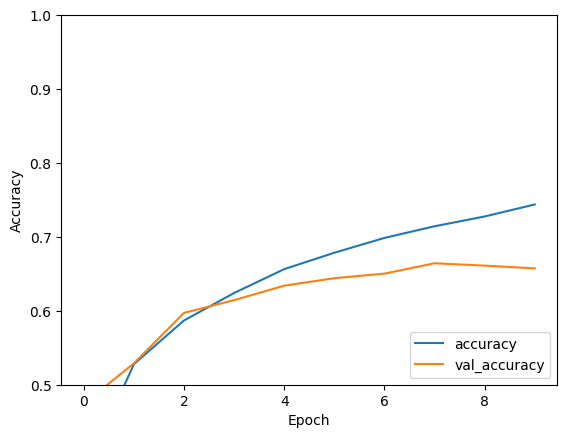

In [19]:
# Visualization and Evaluation (image_de0d9b.png)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

<small>

**Modelin Performansının Görselleştirilmesi ve Değerlendirilmesi**  
Bu bölümde eğitim ve doğrulama doğruluk değerleri grafikle gösterilir.  
Ardından model test verisi üzerinde değerlendirilir.

</small>

In [20]:
test_acc

0.6574000120162964

<small>

**test_acc:**  
Test veri kümesi üzerindeki doğruluk (accuracy) değerini gösterir.  
Modelin gerçek dünyaya ne kadar iyi genelleme yaptığını anlamak için kullanılır.

</small>


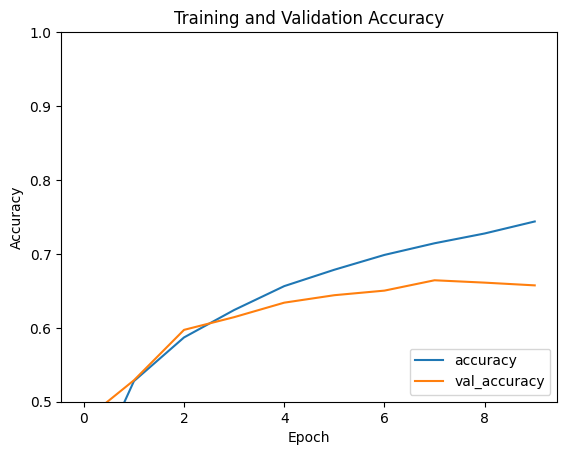

313/313 - 3s - 11ms/step - accuracy: 0.6574 - loss: 1.0638
Test Accuracy: 0.6574000120162964


In [23]:
# --- ACCURACY ---
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.legend(loc='lower right')
plt.title("Training and Validation Accuracy")
plt.show()

# Model değerlendirme
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("Test Accuracy:", test_acc)

<small>

**Accuracy Görselleştirmesi ve Model Değerlendirme**  
Yukarıdaki kod, eğitim ve doğrulama doğruluk değerlerini (accuracy) epoch bazında çizer ve modeli test verisi üzerinde değerlendirir.  
- `history.history['accuracy']` → Eğitim doğruluk değerleri  
- `history.history['val_accuracy']` → Doğrulama doğruluk değerleri  
- `plt.ylim([0.5,1])` → Grafikteki y-ekseni aralığı  
- `model.evaluate` → Test veri kümesi üzerinde kayıp ve doğruluk değerini döndürür

</small>

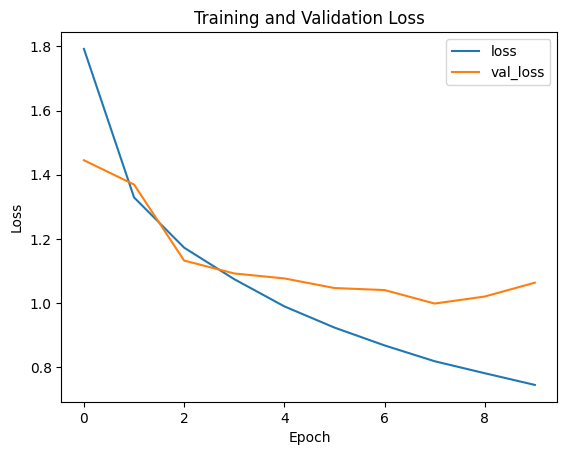

In [21]:
# --- LOSS EĞRİLERİ ---
plt.figure()
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("Training and Validation Loss")
plt.show()


<small>

**Loss Eğrilerinin Görselleştirilmesi**  
Yukarıdaki kod, eğitim ve doğrulama (validation) kayıp değerlerini (loss) epoch bazında çizer.  
- `history.history['loss']` → Eğitim kaybı  
- `history.history['val_loss']` → Doğrulama kaybı  
Grafik, modelin öğrenme sürecini ve overfitting durumunu incelemek için kullanılır.

</small>

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step


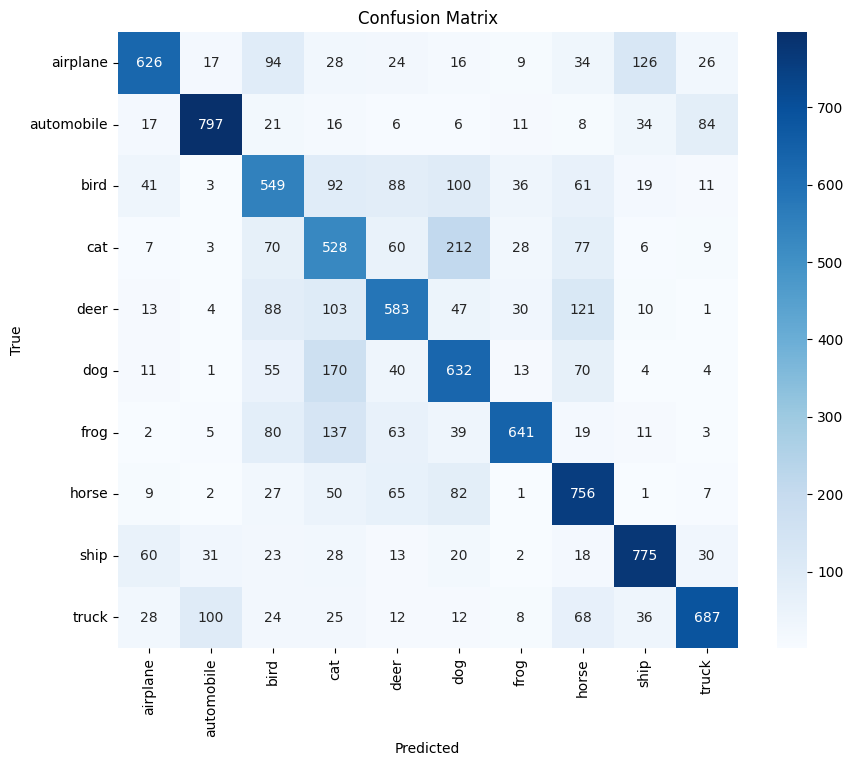

In [22]:
# --- CONFUSION MATRIX ---
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_labels.reshape(-1)

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


<small>

**Confusion Matrix (Karmaşıklık Matrisi) Görselleştirmesi**  
Bu bölümde modelin test verisi üzerindeki sınıf tahminlerinin doğruluğu incelenir.  
- `y_pred` → Modelin test görüntüleri için tahminleri  
- `y_pred_classes` → En yüksek olasılığa sahip sınıfı seçer  
- `y_true` → Gerçek etiketler  
- `confusion_matrix` → Tahmin ve gerçek etiketleri karşılaştırır  
- `sns.heatmap` → Matrisi görselleştirir, renk yoğunluğu hataları gösterir

</small>